# Objectifs pédagogiques :

- Découvrir les modèles de vision et langage

- Expérimenter la génération automatique de légendes

- Développer un esprit critique sur la pertinence et les limites des résultats générés.

# Instructions:

Dans cet atelier, nous allons développer un atelier qui exploite les API de Hugging Face pour offrir plusieurs fonctionnalités puissantes aux utilisateurs. Nous allons générer des images à partir de descriptions textuelles, de transformer des images en histoires et de convertir du texte en discours. Chaque fonctionnalité utilise des modèles d'apprentissage automatique de pointe hébergés sur la plateforme Hugging Face, offrant ainsi une expérience interactive et engageante. Ces outils peuvent être appliqués dans des domaines variés tels que la création artistique, l'éducation et l'accessibilité, tout en exploitant la puissance des modèles les plus récents de l'intelligence artificielle.

## Rappel :

L’IA générative se décline en plusieurs modalités, chacune avec des applications concrètes.

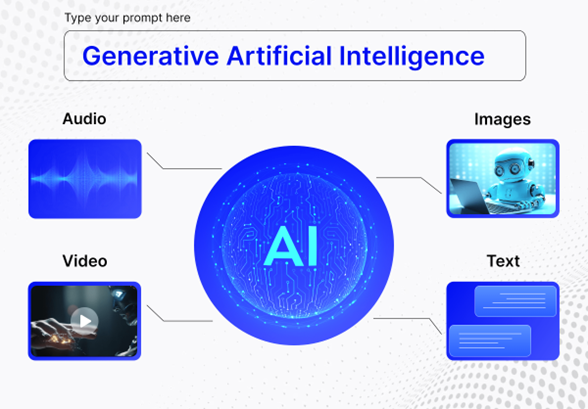

**1.	Text Generation :**

Elle permet de rédiger automatiquement des textes variés : histoires, articles, résumés, traductions ou même du code informatique. Exemple : ChatGPT, Bard, HuggingFace Transformers.

**2.	Image Generation :**

À partir d’une description en langage naturel, l’IA peut créer une image originale : illustration, affiche publicitaire, concept art ou design. Exemple : DALL·E, MidJourney, Gemini

**3.	Video Generation :**

Les modèles plus avancés sont capables de générer des séquences vidéo cohérentes à partir d’un simple texte ou d’une image. Cela
ouvre des possibilités pour le cinéma, les jeux vidéo et l’animation. Exemple : Runway Gen-2, Pika Labs, OpenAI Sora.

**4.	Speech Generation :**

Les IA peuvent synthétiser des voix réalistes (voice cloning) ou composer de la musique originale dans différents styles. Exemple : Suno, AIVA, ElevenLabs.

### Comment fonctionne l’IA générative ?

Le principe repose sur l’utilisation de modèles fondamentaux, qui sont des réseaux de neurones géants entraînés sur des milliards de données.

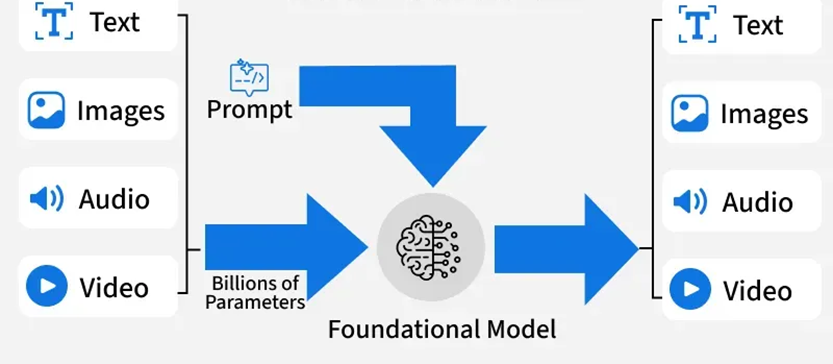

Selon la tâche et le type de contenu à produire, ils utilisent différentes architectures :

- **Les GAN (Generative Adversarial Networks) :** excellents pour produire des images réalistes, mais parfois difficiles à stabiliser lors de l’entraînement.


- **Les VAE (Variational Auto-Encoders) :** plus simples, utiles pour générer des variations et explorer l’espace latent, mais souvent moins réalistes que les GAN.


- **Les Transformers :** très performants pour le texte grâce au mécanisme d’attention, ils sont devenus la base des grands modèles de langage (GPT, LLaMA, Mistral) et s’étendent désormais vers le multimodal (texte + image + audio).


- **Les Modèles de Diffusion :** actuellement la référence pour les images et vidéos de haute qualité ; ils partent d’un bruit aléatoire qu’ils « dénoient » progressivement pour créer un contenu cohérent (ex. Stable Diffusion, DALL·E, Runway, Sora).


## Partie Préliminaire – Exploration des Spaces Hugging Face

### Objectif

Avant de plonger dans le fonctionnement des architectures d’IA générative (Transformers, Diffusion, etc.), cette première étape vise à explorer concrètement quatre modèles hébergés sur Hugging Face. L’objectif est de découvrir les quatre principales modalités de génération de contenu — Texte, Image, Audio et Vidéo — et de se familiariser avec les interfaces en ligne de la plateforme.

Chaque étudiant testera les outils suivants :

| Modalité | Modèle / Space | Tâche principale | Lien Hugging Face |
|----------|----------------|------------------|-------------------|
| 📝 Texte | **MiniMaxAI / MiniMax-M2** | Génération de texte à partir d’un prompt | [MiniMaxAI/MiniMax-M2](https://huggingface.co/MiniMaxAI/MiniMax-M2) |
| 🖼️ Image | **nunchaku-tech / nunchaku-qwen-image-edit-2509** | Génération et édition d’images à partir de texte | [nunchaku-tech/nunchaku-qwen-image-edit-2509](https://huggingface.co/nunchaku-tech/nunchaku-qwen-image-edit-2509) |
| 🔊 Audio | **Kokoro TTS (by hexgrad)** | Synthèse vocale (Text-to-Speech) | [Kokoro TTS - by hexgrad](https://huggingface.co/spaces/hexgrad/Kokoro-TTS) |
| 🎬 Vidéo | **genmo / mochi-1-preview** | Génération de séquences vidéo à partir de texte | [genmo/mochi-1-preview](https://huggingface.co/genmo/mochi-1-preview) |


**1.	Connexion et exploration libre :**

Ouvrez chacun des quatre liens Hugging Face Spaces et expérimentez les fonctionnalités proposées.

- Pour le texte : saisissez un prompt libre et observez la réponse générée.

- Pour l’image : décrivez une scène originale et modifiez-la avec une autre instruction.

- Pour l’audio : collez un court texte et écoutez la voix synthétique générée.

- Pour la vidéo : rédigez un prompt visuel et analysez le clip produit.

**2.	Observation critique :**

Pour chaque modèle, notez dans un tableau :

- La pertinence du résultat par rapport à la consigne,

- La qualité perçue (réalisme, cohérence, fluidité),

- Les limites observées (erreurs, lenteur, incohérences).

Vous venez d’expérimenter les quatre formes de génération les plus courantes de l’IA moderne.

Dans la suite du TP, nous allons comprendre comment ces modèles fonctionnent et comment les interroger via les API Hugging Face pour reproduire les mêmes tâches de façon programmatique.

## Partie 1 : Text to Image


La fonctionnalité "Text to Image" permet aux utilisateurs de générer des images à partir de descriptions textuelles. Grâce à cette fonctionnalité, les utilisateurs peuvent saisir une description sous forme de texte, et l'application interrogera l'API de Hugging Face pour générer une image correspondant à cette description. Par exemple, un utilisateur pourrait saisir "Un astronaute montant un cheval", et le modèle générera une image visualisant ce scénario. Cette fonctionnalité offre un moyen créatif de visualiser des idées et des concepts, ce qui la rend adaptée à des applications artistiques et pratiques.

Dans cette application, nous avons choisi d'utiliser le modèle stable-diffusion-v1-5, qui est réputé pour sa capacité à générer des images de haute qualité et à capturer une large gamme de styles visuels. Cette fonctionnalité offre un moyen créatif de visualiser des idées et des concepts, ce qui la rend adaptée à des applications artistiques et pratiques.

### Comment stable-diffusion-v1-5  fonctionne ?

Le modèle utilise un encodeur de texte fixe et pré-entraîné (CLIP ViT-L/14) pour traiter les entrées textuelles. Ensuite, il utilise un réseau de type UNet comme structure principale pour générer des images à partir des embeddings (représentations vectorielles) du texte. Ce modèle a été formé sur un vaste ensemble de données (LAION-5B) avec des légendes en anglais, lui permettant de comprendre et de visualiser des concepts à partir de descriptions textuelles. Grâce à cette architecture, le modèle est capable de créer des images cohérentes et de qualité à partir d'une simple description, en capturant les détails et le style visuel associés au texte.

**1.	Capacités**

Le modèle Stable Diffusion v1-5 est un outil puissant pour générer des images photoréalistes à partir de descriptions textuelles. Grâce à sa capacité à comprendre et à interpréter les entrées textuelles, il peut créer des images époustouflantes qui sont souvent indiscernables de photos réelles.

**a.	Tâches principales**

- Génération d'images à partir de texte : Le modèle peut générer des images à partir de descriptions textuelles, permettant aux utilisateurs de créer des images personnalisées en fonction de leurs propres descriptions.

- Modification d'images : Le modèle peut également modifier des images existantes en fonction de descriptions textuelles, permettant aux utilisateurs d'éditer et de peaufiner leurs images.

**b.	Points forts**

- Images de haute qualité : Le modèle est capable de générer des images de haute qualité, souvent photoréalistes.

- Flexibilité : Le modèle peut être utilisé avec une variété de descriptions textuelles, permettant aux utilisateurs de générer une large gamme d'images.

- Personnalisabilité : Le modèle peut être ajusté pour générer des images qui répondent à des exigences ou des styles spécifiques.


**2.	Architecture du modèle**

Le modèle Stable Diffusion v1-5 est composé des composants suivants :

**a. Autoencodeur :** Il encode les images en représentations latentes, ce qui permet de réduire la complexité des images tout en conservant leurs caractéristiques essentielles.

**b. Encodeur de texte (CLIP ViT-L/14) :** Cet encodeur transforme les descriptions textuelles (prompts) en embeddings, permettant ainsi au modèle de comprendre le contenu et le contexte des instructions données sous forme de texte.

**c. Backbone UNet :** Ce composant prend les représentations encodées du texte et de l'image en entrée, puis génère une image en sortie en combinant ces informations.

Grâce à cette architecture, le modèle est capable de générer des images photoréalistes à partir de simples descriptions textuelles.

**3.	Limitations**

Bien que Stable Diffusion v1-5 soit un outil puissant pour générer des images, il présente certaines limitations :

**a. Manque de photoréalisme parfait**

Le modèle ne parvient pas toujours à atteindre un photoréalisme complet. Cela signifie que les images générées peuvent ne pas être aussi réalistes que souhaité.

**b. Problèmes de rendu du texte**

Le modèle a des difficultés à rendre un texte lisible. Cela peut poser problème si vous tentez de générer des images contenant du texte.

**c. Défis de composition**

Le modèle rencontre des difficultés avec des tâches plus complexes impliquant la composition, comme la génération d’une image représentant « Un cube rouge sur une sphère bleue ».

**d. Problèmes de génération de visages et de personnes**

Les visages et les personnes en général peuvent ne pas être générés correctement. Cela peut être un problème si vous tentez de créer des images de personnes.


**4.	Comment on peut utiliser le model avec Inference API**



In [1]:
import torch
latents = torch.randn((1, 4, 64, 64))
latents

tensor([[[[-0.1278, -0.5796,  0.4599,  ..., -1.0612, -0.8288, -0.1657],
          [ 0.3214, -0.0299, -2.4007,  ...,  0.4246, -1.4585, -0.9391],
          [ 0.1745,  1.0260, -0.1485,  ...,  0.5882,  0.6603, -0.7819],
          ...,
          [ 0.2569,  2.0698, -1.1685,  ..., -1.8190,  0.7327,  1.4969],
          [-0.7189, -1.0753, -0.3224,  ...,  2.5134, -0.7373, -2.4984],
          [-1.4025, -0.7760,  1.2552,  ...,  0.4466, -0.6755,  0.7278]],

         [[-1.1585, -1.0019, -1.6499,  ...,  0.8352, -1.8507, -2.1007],
          [ 1.3749,  1.3356, -0.1179,  ..., -1.1486,  0.9126,  0.2142],
          [ 0.5021, -0.1498, -0.9224,  ...,  0.1273,  0.7293,  1.5324],
          ...,
          [-1.8390, -1.5584, -0.1717,  ...,  1.3069,  0.3152, -0.6066],
          [ 2.2614, -0.0315,  0.7663,  ..., -1.5727, -0.0153,  2.2820],
          [-2.1050, -0.0156,  0.5078,  ...,  0.7455, -0.6742, -0.2046]],

         [[-1.7750, -0.9935,  1.2219,  ...,  1.4782, -1.2283, -0.8467],
          [-0.7722,  0.3191,  

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

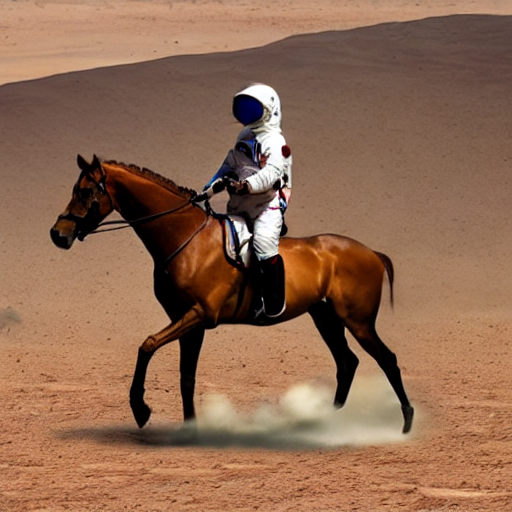

In [3]:
# Importation des bibliothèques nécessaires
from diffusers import StableDiffusionPipeline   # pipeline de génération d'image
import torch                                    # pour gérer CUDA/CPU
from IPython.display import display             # pour afficher l'image directement dans le notebook

# 1. Charger le modèle
# Ici on choisit "sd-legacy/stable-diffusion-v1-5", une version de Stable Diffusion 1.5
# torch_dtype=torch.float16 => permet de réduire la consommation mémoire GPU
model_id = "sd-legacy/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")  # envoie le modèle sur la carte graphique si disponible

# 2. Définir le prompt (texte qui décrit l’image à générer)
prompt = "a photo of an astronaut riding a horse on mars"

# 3. Générer l’image
image = pipe(prompt).images[0]

# 4. Afficher et sauvegarder l’image
display(image)             # affiche directement l'image sous la cellule du notebook
image.save("astronaut.png")  # enregistre l'image en fichier PNG




**Bonus :** Tester d’autres prompts ou modèles (par ex. stabilityai/stable-diffusion-2 ou CompVis/stable-diffusion-v1-4).

## Partie 2 — Image to Text

### Objectif :

À partir d’une image choisie, générer automatiquement une légende descriptive en langage naturel en utilisant le modèle ViT-GPT2 Image Captioning.


### Processus de réalisation

1. Un encodeur visuel (ViT = Vision Transformer) extrait les caractéristiques de l’image.

2. Un décodeur de langage (GPT-2) transforme ces représentations visuelles en une phrase descriptive.

3. Le résultat est une légende courte, qui résume le contenu principal de l’image.

### Les modèles ?

- ViT-GPT2 Image Captioning : modèle combinant ViT pour l’analyse visuelle et GPT-2 pour la génération textuelle, robuste pour produire des descriptions simples et variées.

- BLIP-2 (optionnel, pour comparaison) : modèle plus récent et multimodal, capable de donner des légendes plus riches et contextuelles.


In [17]:
# Importation des bibliothèques nécessaires
from transformers import VisionEncoderDecoderModel, ViTImageProcessor, AutoTokenizer
import torch
from PIL import Image

# Chargement du modèle de captioning (Vision + GPT2) depuis Hugging Face
model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Le feature extractor prépare les images (redimensionnement, normalisation, tensorisation)
feature_extractor = ViTImageProcessor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Le tokenizer convertit les tokens en texte (et inversement)
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

# Choix du device (GPU si disponible, sinon CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Paramètres de génération de texte
max_length = 20       # longueur maximale de la légende
num_beams = 4         # beam search : nombre de séquences explorées pour trouver la meilleure
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

# Fonction pour générer une légende à partir d'une ou plusieurs images
def predict_step(image_paths):
    images = []
    for image_path in image_paths:
        i_image = Image.open(image_path)       # ouverture de l'image
        if i_image.mode != "RGB":              # certaines images sont en mode L ou RGBA
            i_image = i_image.convert(mode="RGB") # conversion en RGB obligatoire
        images.append(i_image)
    # Transformation des images en tenseurs adaptés au modèle
    pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
    pixel_values = pixel_values.to(device)
    
    # Génération de la séquence de tokens (légende)
    output_ids = model.generate(pixel_values, **gen_kwargs)

    # Décodage des tokens en texte lisible
    preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    preds = [pred.strip() for pred in preds]
    return preds

# Test de la fonction sur une image
predict_step(['/content/astronaut.png'])


['a man riding on the back of a brown horse']

In [22]:
predict_step(['/content/pexels-photo-1108099.jpg'])

['two dogs are sitting in a field with flowers']

### Exercice : Analyse d’images et génération de légendes

#### Partie A – Utilisation de `vit-gpt2-image-captioning`

1. Choisissez **deux images différentes** 

   * Générez une légende automatique pour chacune avec `vit-gpt2`.
   * Comparez : la légende est-elle correcte ? exhaustive ? trop vague ?

2. Prenez **la même image** mais relancez la génération **plusieurs fois**.

   * Les sorties changent-elles ou sont-elles toujours identiques ?
   * Que pouvez-vous conclure sur la créativité du modèle ?

3. Limitez la **longueur de sortie** (max_length=10) puis augmentez (max_length=40).

   * Qu’observez-vous ? Pourquoi le changement est-il limité ?

---

#### Partie B – Utilisation d’un modèle “instructif” (BLIP-2, InstructBLIP, Florence-2)


4. Donnez comme instruction :

   * “Describe this image in one sentence.”
   * “Explain this image for children aged 8–10.”
   * Comparez les différences de style, de longueur et de précision.

5. Demandez au modèle :

   * “Invent a short story (80–100 words) based on this image.”
   * Analysez : la mini-histoire correspond-elle à ce que vous voyez ?
   * Y a-t-il des **hallucinations** (éléments inventés, lieux/objets inexistants) ?

6. Comparez `vit-gpt2` et `BLIP-2` sur la même image 

---
